In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("data/wine_date.csv", delimiter=',')

In [4]:
df.drop(columns=["Id"], inplace=True)
print(df.columns.tolist())

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [7]:
from sklearn.preprocessing import StandardScaler

def get_sorted_eigen(df_cov):
    cov_matrix = df_cov.values
    
    eigvals, eigvecs = np.linalg.eigh(cov_matrix)
    
    idx = np.argsort(eigvals)[::-1]
    sorted_eigvals = eigvals[idx]
    sorted_eigvecs = eigvecs[:, idx]
    
    return sorted_eigvals, sorted_eigvecs

X = df.drop(columns=["quality"])
feature_names = X.columns

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std_df = pd.DataFrame(X_std, columns=feature_names)

cov_mat = np.cov(X_std_df.T)
df_cov = pd.DataFrame(cov_mat, index=feature_names, columns=feature_names)
eigvals, eigvecs = get_sorted_eigen(df_cov)

PCs = X_std_df.values @ eigvecs    
pc_columns = [f"PC{i+1}" for i in range(PCs.shape[1])]
df_pcs = pd.DataFrame(PCs, columns=pc_columns)
df_pcs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,1.561545,-0.444892,1.767209,0.132635,-0.130138,0.906815,-0.122336,0.330086,0.011548,0.249611,0.046465
1,0.760892,-1.915058,0.864158,0.536890,-0.090935,-0.860406,-0.998623,-0.746939,-0.547644,-0.005196,-0.134810
2,0.708085,-0.914423,1.142363,0.435075,-0.024940,-0.356702,-0.536162,-0.575652,-0.084118,0.203715,-0.122553
3,-2.308166,0.224448,-0.256895,-0.830630,1.639209,0.154720,0.300410,0.494589,0.110087,0.121798,0.313678
4,1.561545,-0.444892,1.767209,0.132635,-0.130138,0.906815,-0.122336,0.330086,0.011548,0.249611,0.046465


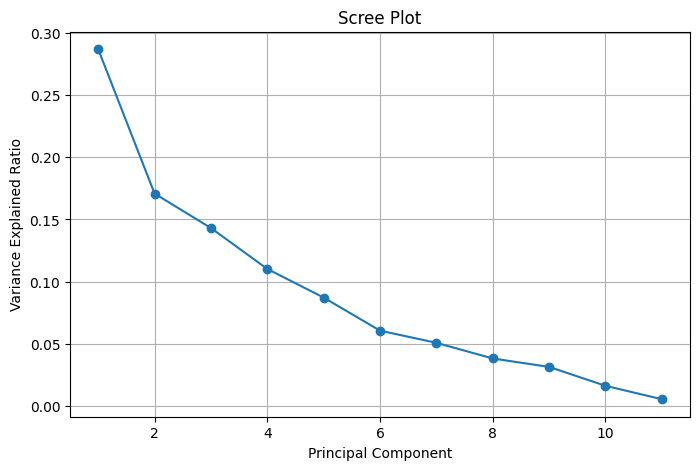

PC1 variance %: 28.692344849097235
PC2 variance %: 17.075103623671797
Total variance (PC1 + PC2): 45.76744847276903


In [9]:
import matplotlib.pyplot as plt

total_variance = eigvals.sum()
explained_variance_ratio = eigvals / total_variance

plt.figure(figsize=(8,5))
plt.plot(
    np.arange(1, len(eigvals)+1),
    explained_variance_ratio,
    marker='o'
)
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained Ratio")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

var_pc1 = explained_variance_ratio[0]
var_pc2 = explained_variance_ratio[1]
total_first_two = var_pc1 + var_pc2

print("PC1 variance %:", var_pc1 * 100)
print("PC2 variance %:", var_pc2 * 100)
print("Total variance (PC1 + PC2):", total_first_two * 100)

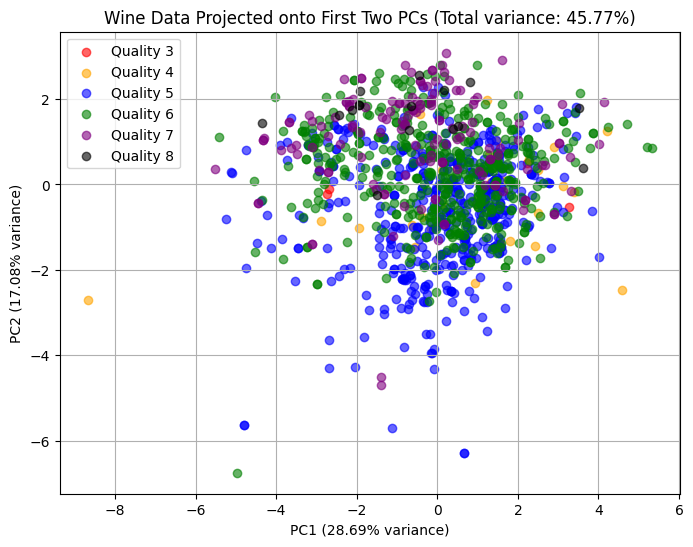

In [15]:
colors = ["red", "orange", "blue", "green", "purple", "black"]

df_plot = pd.DataFrame({
    "PC1": df_pcs["PC1"],
    "PC2": df_pcs["PC2"],
    "quality": df["quality"]
})

plt.figure(figsize=(8,6))
qualities = sorted(df["quality"].unique()) 
for i, q in enumerate(qualities):
    subset = df_plot[df_plot["quality"] == q]
    plt.scatter(
        subset["PC1"],
        subset["PC2"],
        color=colors[i],
        label=f"Quality {q}",
        alpha=0.6
    )

pc1_var = explained_variance_ratio[0] * 100
pc2_var = explained_variance_ratio[1] * 100
total_2 = pc1_var + pc2_var

plt.xlabel(f"PC1 ({pc1_var:.2f}% variance)")
plt.ylabel(f"PC2 ({pc2_var:.2f}% variance)")
plt.title(f"Wine Data Projected onto First Two PCs (Total variance: {total_2:.2f}%)")
plt.legend()
plt.grid(True)
plt.show()

The quality groups largely overlap and do not form clearly separated clusters in the PC1–PC2 space. This means the first two principal components capture overall variance but do not fully separate wine quality classes.

Quality 6, because it forms the densest, most centralized cluster. Most wines are quality 5, and the points cluster relatively tightly, making this class easier to identify.

Quality 4 and 5, because these classes overlap heavily with neighboring class. Their points are widely spread and don't show a clear boundary, making them the most difficult to distinguish.

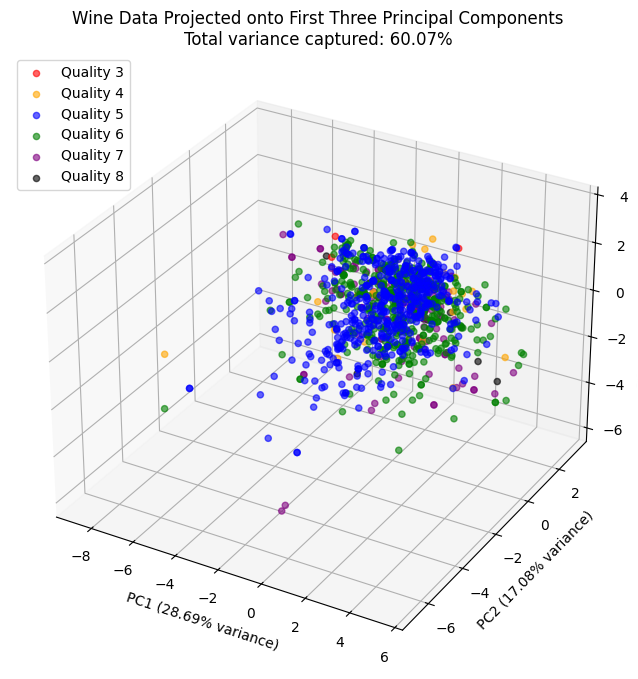

In [11]:
from mpl_toolkits.mplot3d import Axes3D  

colors = ["red", "orange", "blue", "green", "purple", "black"]

df_plot_3D = pd.DataFrame({
    "PC1": df_pcs["PC1"],
    "PC2": df_pcs["PC2"],
    "PC3": df_pcs["PC3"],
    "quality": df["quality"]
})

pc1_var = explained_variance_ratio[0] * 100
pc2_var = explained_variance_ratio[1] * 100
pc3_var = explained_variance_ratio[2] * 100
total_3 = pc1_var + pc2_var + pc3_var

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

qualities = sorted(df["quality"].unique())

for i, q in enumerate(qualities):
    subset = df_plot_3D[df_plot_3D["quality"] == q]
    ax.scatter(
        subset["PC1"],
        subset["PC2"],
        subset["PC3"],
        color=colors[i],
        label=f"Quality {q}",
        alpha=0.6
    )

ax.set_xlabel(f"PC1 ({pc1_var:.2f}% variance)")
ax.set_ylabel(f"PC2 ({pc2_var:.2f}% variance)")
ax.set_zlabel(f"PC3 ({pc3_var:.2f}% variance)")

ax.set_title(
    f"Wine Data Projected onto First Three Principal Components\n"
    f"Total variance captured: {total_3:.2f}%"
)
ax.legend(loc='upper left')

In [12]:
import plotly.express as px

pca_3d_df = pd.DataFrame({
    "PC1": df_pcs["PC1"],
    "PC2": df_pcs["PC2"],
    "PC3": df_pcs["PC3"],
    "quality": df["quality"]
})

fig = px.scatter_3d(
    pca_3d_df,
    x="PC1",
    y="PC2",
    z="PC3",
    color="quality",     
    opacity=0.7,
    title="Interactive 3D Scatter Plot of First 3 Principal Components",
)

fig.show()

Adding PC3 increases the total variance represented in the visualization and helps separate classes that overlapped in the 2D PC1–PC2 plot.

Quality 5 is easier to distinguish in 3d and shows more seperation.

In [13]:
sqrt_eigvals = np.sqrt(eigvals)
loadings = eigvecs * sqrt_eigvals 

loading_df = pd.DataFrame(
    loadings,
    index=feature_names,                      
    columns=[f"PC{i+1}" for i in range(len(eigvals))]
)
loading_df_3 = loading_df[["PC1", "PC2", "PC3"]]
loading_df_3

,PC1,PC2,PC3
fixed acidity,-0.862609,0.140302,0.153582
volatile acidity,0.403710,-0.395954,0.556867
citric acid,-0.817708,0.200876,-0.309789
residual sugar,-0.310156,-0.345875,-0.114656
chlorides,-0.399670,-0.209961,0.065966
free sulfur dioxide,0.085049,-0.708887,-0.537503
total sulfur dioxide,-0.026782,-0.791661,-0.405898
density,-0.710373,-0.298264,0.419470
pH,0.769309,0.008739,-0.075203
sulphates,-0.422215,0.085392,-0.379974


Because sqrt(eigenvalue) scales the eigenvector by the variance captured by that PC, turning unit-length directions into loadings that reflect both orientation and variance.

The resulting loadings tell us how strongly each original feature contributes to each principal component.

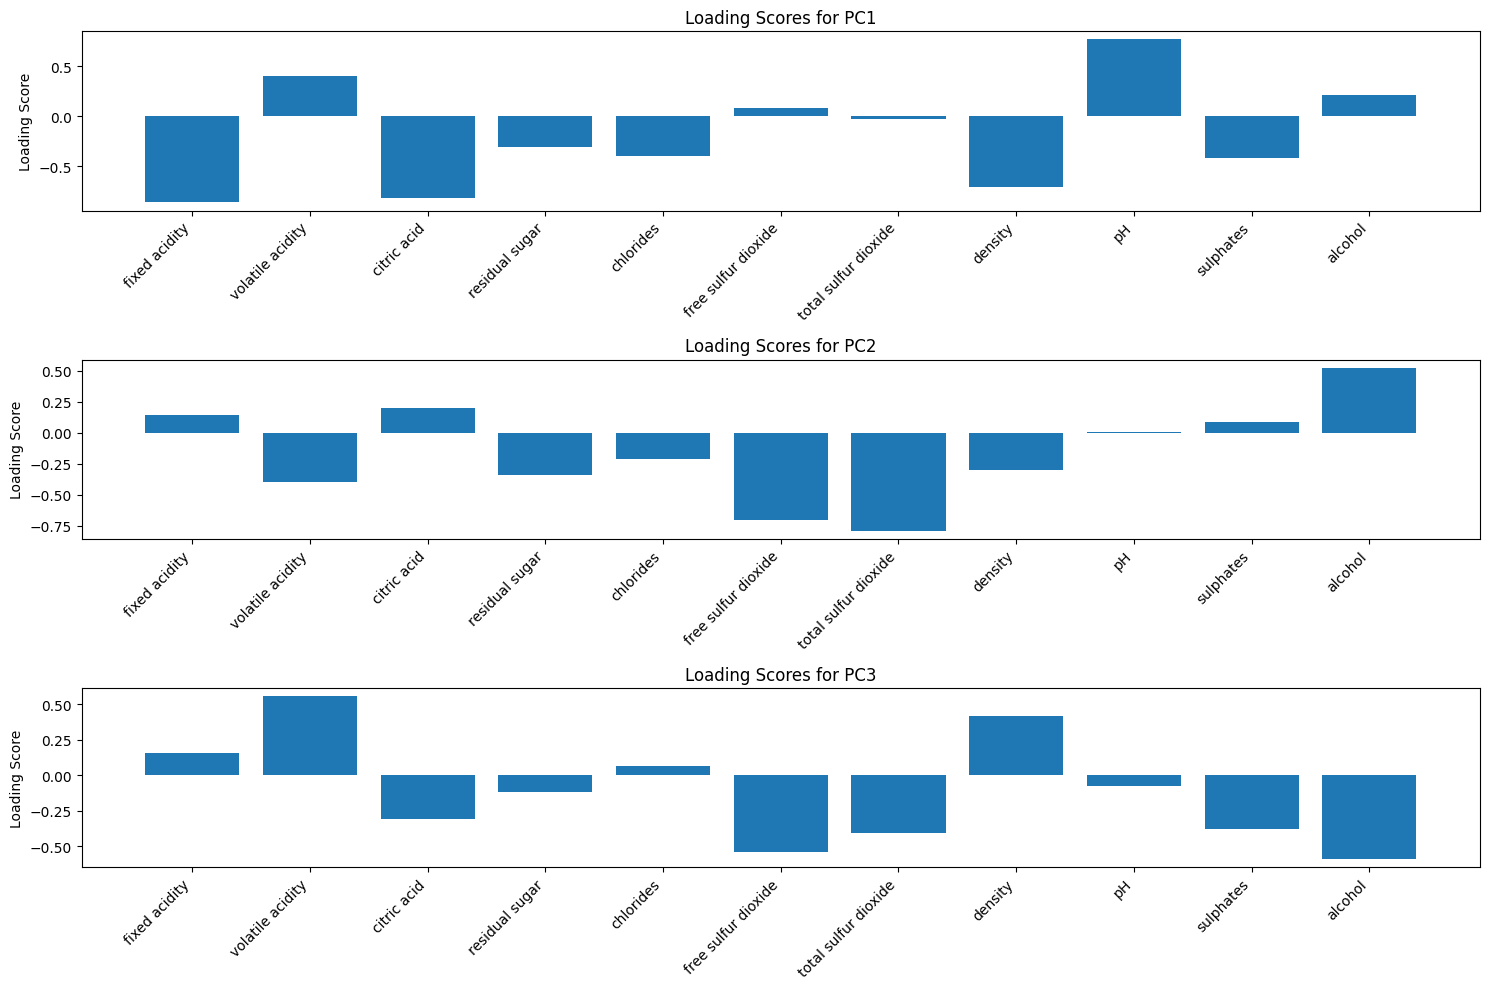

In [14]:
pcs_to_plot = ["PC1", "PC2", "PC3"]

plt.figure(figsize=(15, 10))
for i, pc in enumerate(pcs_to_plot):
    plt.subplot(3, 1, i+1)
    plt.bar(loading_df.index, loading_df[pc])
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Loading Score")
    plt.title(f"Loading Scores for {pc}")
plt.tight_layout()
plt.show()

A lower PC3 value is expected because both features have negative loading scores on PC3

A lower PC3 value corresponds to higher-quality wines in the 3D PCA plot, so high alcohol and high free sulfur dioxide indicate a higher-quality wine.